In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.

A Solar é uma rede de farmácias que opera com mais de 3.000 estabelecimentos em 7 países. Atualmente, os gerentes de cada farmácia da rede Solar têm a tarefa de prever suas vendas diárias com até seis semanas de antecedência. As vendas nas lojas são influenciadas por vários fatores, incluindo promoções, competidores, feriados escolares e estaduais, sazonalidade e localidade. Com milhares de gerentes prevendo vendas com base em suas circunstâncias únicas, a precisão dos resultados pode ser bastante variada.

Para as previsões você deve considerar um ID, que é um número representando a combinação entre o ID da loja e uma data. Além do ID, sua submissão deve conter a previsão do volume de vendas. Leia atentamente a descrição dos principais campos nos arquivos fornecidos nesta competição.

# Descrição dos Campos
* ID - um ID que representa uma tupla (Store, Date) dentro do conjunto de dados
* Store - um ID único para cada loja
* Sales - o volume de negócios de um determinado dia (é isso que você está prevendo)
* Customers - o número de clientes em um determinado dia
* Open - um indicador para saber se a loja estava aberta: 0 = fechada, 1 = aberta
* StateHoliday - indica um feriado estadual. Normalmente, todas as lojas, com poucas exceções, estão fechadas nos feriados estaduais. Note que todas as escolas estão fechadas nos feriados e fins de semana. a = feriado público, b = feriado de Páscoa, c = Natal, 0 = Nenhum
* SchoolHoliday - indica se a (Store, Date) foi afetada pelo fechamento de escolas públicas
* StoreType - diferencia entre 4 modelos de lojas diferentes: a, b, c, d
* Assortment - descreve um nível: a = básico, b = extra, c = estendido
* CompetitionDistance - distância em metros até a loja concorrente mais próxima
* CompetitionOpenSince[Month/Year] - indica o ano e mês aproximado da hora em que o concorrente mais próximo foi aberto
* Promo - indica se uma loja está executando uma promoção nesse dia
* Promo2 - promoção contínua e consecutiva para algumas lojas: 0 = loja não está participando, 1 = loja está participando
* Promo2Since[Year/Week] - descreve o ano e a semana do calendário em que a loja começou a participar do Promo2
* PromoInterval - descreve os intervalos consecutivos que o Promo2 é iniciado, indicando os meses em que a promoção é iniciada novamente. Por exemplo. "Feb, May, Aug, Nov" significa que cada rodada começa em fevereiro, maio, agosto, novembro de qualquer ano para aquela loja.

In [7]:
dflojas = pd.read_csv("lojas.csv")
dflojas.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [8]:
dftreino = pd.read_csv("dataset_treino.csv")
dftreino.head(10)

/home/anderzanic/App/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [9]:
dflojas.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [103]:
dfteste = pd.read_csv("dataset_teste.csv")
dfteste.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [104]:
dfteste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null object
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


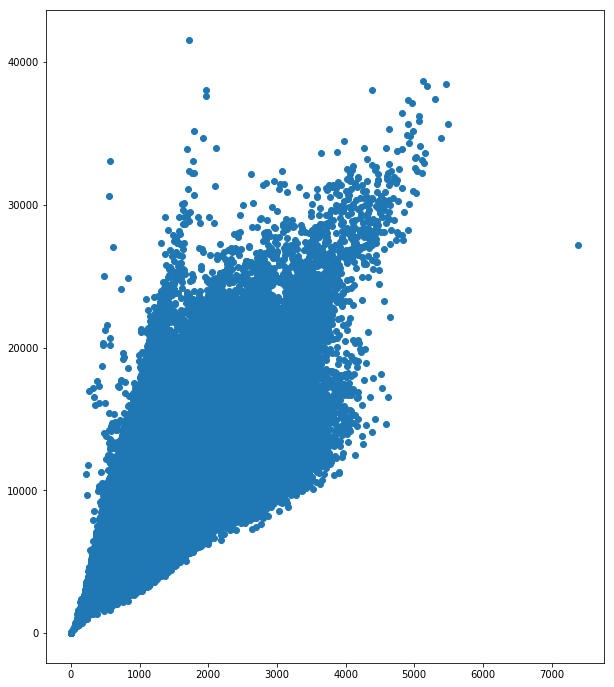

In [12]:
plt.figure(figsize=(10, 12))
plt.scatter(dftreino['Customers'], dftreino['Sales'])

In [13]:
dftreino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


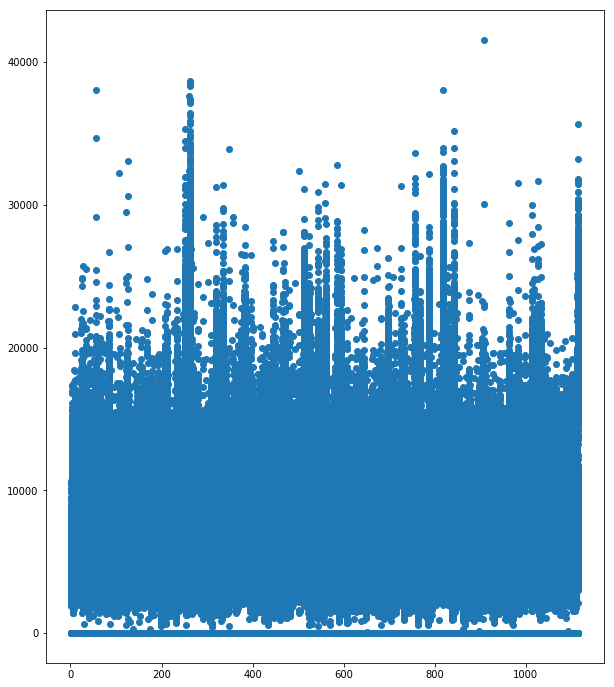

In [14]:
plt.figure(figsize=(10, 12))
plt.scatter(dftreino['Store'], dftreino['Sales'])

In [15]:
type(dftreino['Date'].iloc[0])

str

In [16]:
dftreino['Timestamp'] = pd.to_datetime(dftreino['Date'])

In [17]:
type(dftreino['Timestamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
dftreino.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Timestamp
0,1,5,2015-07-31,5263,555,1,1,0,1,2015-07-31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015-07-31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015-07-31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015-07-31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015-07-31


/home/anderzanic/App/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


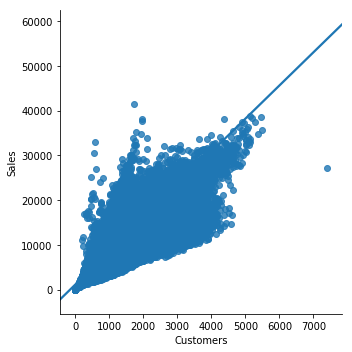

In [19]:
sns.lmplot(x = 'Customers', y = 'Sales', data = dftreino)

(array([6.68742e+05, 3.09720e+05, 2.78460e+04, 6.43000e+03, 3.74600e+03,
        6.13000e+02, 1.06000e+02, 5.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   0. ,  738.8, 1477.6, 2216.4, 2955.2, 3694. , 4432.8, 5171.6,
        5910.4, 6649.2, 7388. ]),
 <a list of 10 Patch objects>)

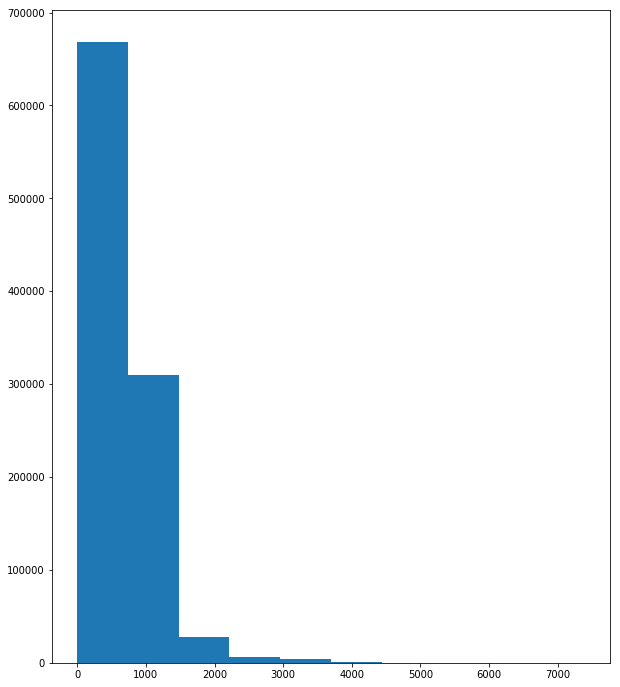

In [20]:
plt.figure(figsize=(10, 12))
plt.hist(x = 'Customers', data = dftreino)

In [21]:
dftreino['Timestamp'].iloc[0].day

31

In [22]:
dftreino['Year'] = dftreino['Timestamp'].apply(lambda data: data.year)
dftreino['Month'] = dftreino['Timestamp'].apply(lambda data: data.month)
dftreino['Day'] = dftreino['Timestamp'].apply(lambda data: data.day)
dftreino.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Timestamp,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015-07-31,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015-07-31,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015-07-31,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015-07-31,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015-07-31,2015,7,31


In [23]:
porMes = dftreino.groupby('Month').count()
porMes['Sales'].head(12)

Month
1     103694
2      93660
3     103695
4     100350
5     103695
6     100350
7      98115
8      63550
9      61500
10     63550
11     61500
12     63550
Name: Sales, dtype: int64

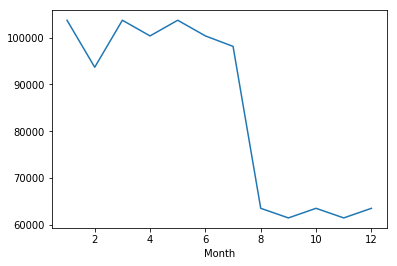

In [24]:
porMes['Sales'].plot()

In [25]:
dftreino.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,0.000290,0.001467,0.000023
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,0.001937,-0.005362,0.005136
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,0.023519,0.048768,-0.011612
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.001212,0.038179,-0.004473
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,-0.001009,-0.000681,0.033428
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.024300,-0.011747,-0.108325
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.036535,0.103282,0.030538
Year,0.000290,0.001937,0.023519,-0.001212,-0.001009,0.024300,-0.036535,1.000000,-0.269382,-0.002485
Month,0.001467,-0.005362,0.048768,0.038179,-0.000681,-0.011747,0.103282,-0.269382,1.000000,0.012442
Day,0.000023,0.005136,-0.011612,-0.004473,0.033428,-0.108325,0.030538,-0.002485,0.012442,1.000000


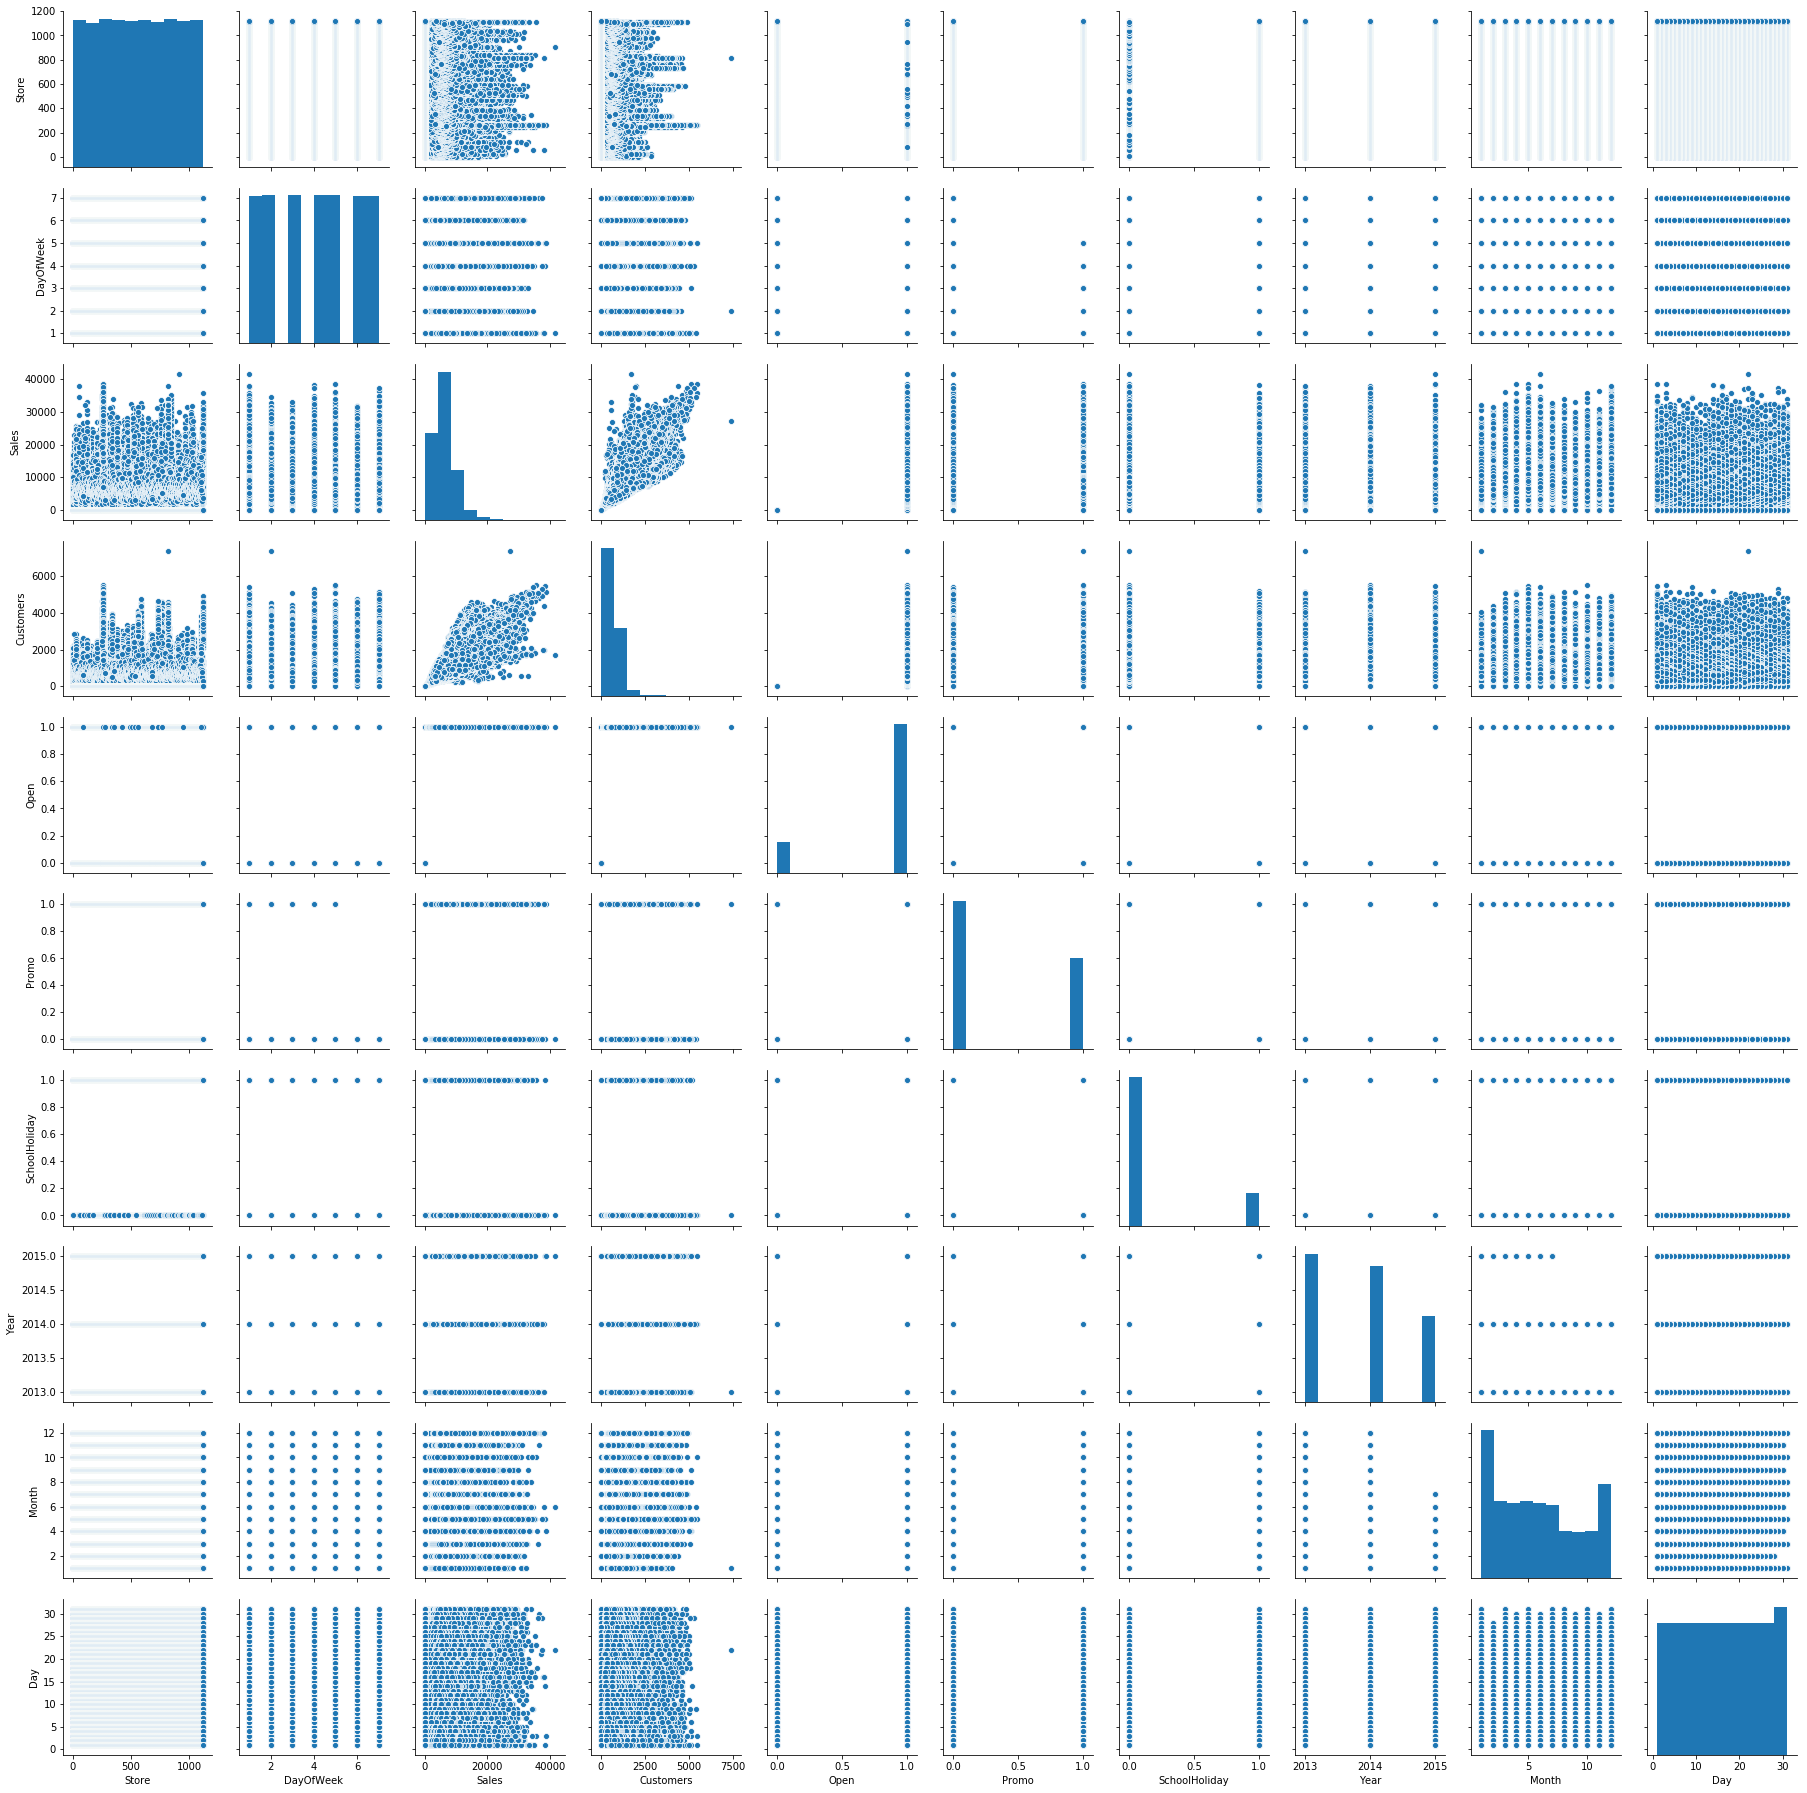

In [26]:
sns.pairplot(dftreino)

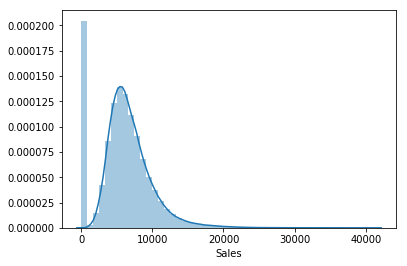

In [27]:
sns.distplot(dftreino['Sales'])

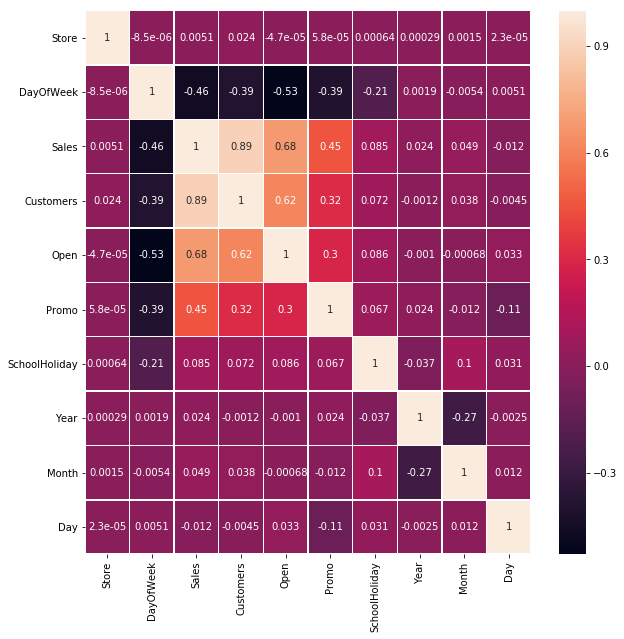

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dftreino.corr(), annot = True, linewidths=.5, ax=ax)

In [29]:
dftreino.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Timestamp', 'Year', 'Month', 'Day'],
      dtype='object')

In [30]:
dftreino.isnull().values.any()

False

In [31]:
dftreino[dftreino.isna().values]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Timestamp,Year,Month,Day


In [32]:
dftreino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
Timestamp        1017209 non-null datetime64[ns]
Year             1017209 non-null int64
Month            1017209 non-null int64
Day              1017209 non-null int64
dtypes: datetime64[ns](1), int64(10), object(2)
memory usage: 100.9+ MB


In [33]:
dftreino.groupby('StateHoliday').count()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Timestamp,Year,Month,Day
StateHoliday,,,,,,,,,,,,
0,131072,131072,131072,131072,131072,131072,131072,131072,131072,131072,131072,131072
0,855087,855087,855087,855087,855087,855087,855087,855087,855087,855087,855087,855087
a,20260,20260,20260,20260,20260,20260,20260,20260,20260,20260,20260,20260
b,6690,6690,6690,6690,6690,6690,6690,6690,6690,6690,6690,6690
c,4100,4100,4100,4100,4100,4100,4100,4100,4100,4100,4100,4100


In [34]:
def strToInt(x):
    if x == 0:
        return 0
    if x == '0':
        return 1
    elif x == 'a':
        return 2
    elif x == 'b':
        return 3
    elif x == 'c':
        return 4
    
dftreino['StateHoliday'] = dftreino['StateHoliday'].apply(lambda x: strToInt(x))

In [35]:
dftreino.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Timestamp,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,1,1,2015-07-31,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,1,1,2015-07-31,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,1,1,2015-07-31,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,1,1,2015-07-31,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,1,1,2015-07-31,2015,7,31


In [36]:
dftreino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null int64
SchoolHoliday    1017209 non-null int64
Timestamp        1017209 non-null datetime64[ns]
Year             1017209 non-null int64
Month            1017209 non-null int64
Day              1017209 non-null int64
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 100.9+ MB


In [37]:
X = dftreino[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day']]
y = dftreino['Sales']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 64)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661185 entries, 763524 to 825796
Data columns (total 10 columns):
Store            661185 non-null int64
DayOfWeek        661185 non-null int64
Customers        661185 non-null int64
Open             661185 non-null int64
Promo            661185 non-null int64
StateHoliday     661185 non-null int64
SchoolHoliday    661185 non-null int64
Year             661185 non-null int64
Month            661185 non-null int64
Day              661185 non-null int64
dtypes: int64(10)
memory usage: 55.5 MB


In [41]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
#Verificando a qualidade do modelo
print(lm.intercept_)

-284234.7943127566


In [43]:
lm.coef_

array([-1.46252537e-01, -5.66130297e+01,  6.05979671e+00,  1.67457221e+03,
        1.28049670e+03, -3.44321979e+01, -3.83992790e+00,  1.41222417e+02,
        3.56014954e+01,  1.67429660e+00])

In [44]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeficiente'])
cdf

,Coeficiente
Store,-0.146253
DayOfWeek,-56.613030
Customers,6.059797
Open,1674.572211
Promo,1280.496704
StateHoliday,-34.432198
SchoolHoliday,-3.839928
Year,141.222417
Month,35.601495
Day,1.674297


In [45]:
predicao = lm.predict(X_test)
predicao

array([-159.61580372, 5735.73210758, 4447.0331213 , ..., 6159.40150804,
       7062.46367055, 5107.69150035])

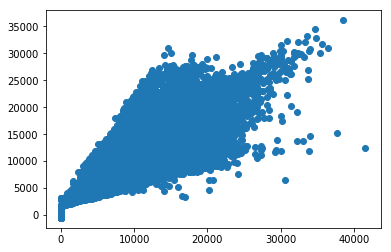

In [46]:
plt.scatter(y_test, predicao)

/home/anderzanic/App/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


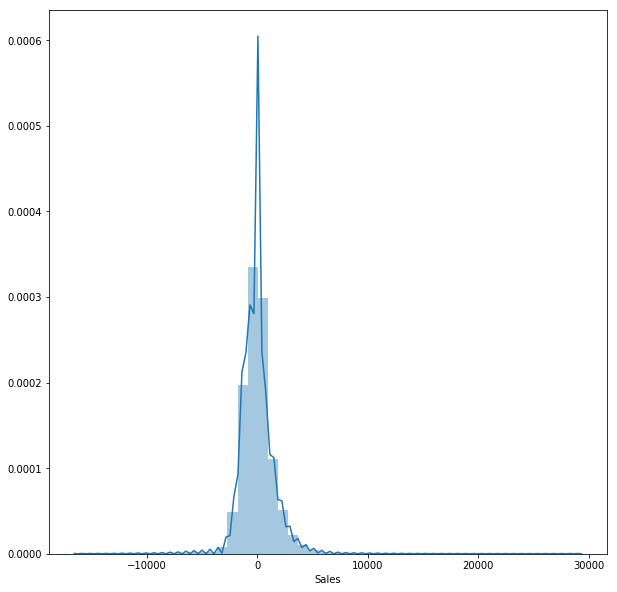

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(y_test-predicao, label = 'Distribuição diferença entre o real e a predição', ax=ax)

In [148]:
from sklearn.metrics import classification_report, confusion_matrix

In [107]:
dfteste.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [106]:
dfteste.groupby('StateHoliday').count()

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday
StateHoliday,,,,,,,
0,40908,40908,40908,40908,40897,40908,40908
a,180,180,180,180,180,180,180


In [108]:
dfteste['Timestamp'] = dfteste['Date'].apply(lambda x: pd.to_datetime(x))
dfteste['Year'] = dfteste['Timestamp'].apply(lambda time: time.year)
dfteste['Month'] = dfteste['Timestamp'].apply(lambda time: time.month)
dfteste['Day'] = dfteste['Timestamp'].apply(lambda time: time.day)
dfteste.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Timestamp,Year,Month,Day
0,1,1,4,2015-09-17,1.0,1,0,0,2015-09-17,2015,9,17
1,2,3,4,2015-09-17,1.0,1,0,0,2015-09-17,2015,9,17
2,3,7,4,2015-09-17,1.0,1,0,0,2015-09-17,2015,9,17
3,4,8,4,2015-09-17,1.0,1,0,0,2015-09-17,2015,9,17
4,5,9,4,2015-09-17,1.0,1,0,0,2015-09-17,2015,9,17


In [109]:
def strToInt(x):
    if x == 0:
        return 0
    elif x == '0':
        return 1
    else:
        return 2

dfteste['StateHoliday'] = dfteste['StateHoliday'].apply(lambda x: strToInt(x))
dfteste.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Timestamp,Year,Month,Day
0,1,1,4,2015-09-17,1.0,1,1,0,2015-09-17,2015,9,17
1,2,3,4,2015-09-17,1.0,1,1,0,2015-09-17,2015,9,17
2,3,7,4,2015-09-17,1.0,1,1,0,2015-09-17,2015,9,17
3,4,8,4,2015-09-17,1.0,1,1,0,2015-09-17,2015,9,17
4,5,9,4,2015-09-17,1.0,1,1,0,2015-09-17,2015,9,17


In [120]:
dfteste[dfteste.isnull().values]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Timestamp,Year,Month,Day


In [116]:
dfteste['Open'] = dfteste['Open'].fillna(1);

In [125]:
dfteste[dfteste.isna().values]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [124]:
dfteste[dfteste.isnull().values]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [135]:
dfteste['Customers'] = dftreino['Customers'].mean()

In [136]:
dfteste.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Timestamp', 'Year', 'Month', 'Day', 'Customers'],
      dtype='object')

In [137]:
XTest = dfteste[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day']]

In [138]:
XTest[XTest.isnull().values]

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day


In [139]:
XTest[XTest.isnull().values]

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day


In [140]:
XTest.head()

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,4,633.145946,1.0,1,1,0,2015,9,17
1,3,4,633.145946,1.0,1,1,0,2015,9,17
2,7,4,633.145946,1.0,1,1,0,2015,9,17
3,8,4,633.145946,1.0,1,1,0,2015,9,17
4,9,4,633.145946,1.0,1,1,0,2015,9,17


In [141]:
predicaoDFTeste = lm.predict(XTest)
predicaoDFTeste

array([7208.02642996, 7207.73392489, 7207.14891474, ..., 5589.28060386,
       5589.13435133, 5585.14817089])

In [143]:
dfPredito = pd.DataFrame(predicaoDFTeste)
dfPredito.count()

0    41088
dtype: int64

In [144]:
dfPredito.describe()

,0
count,41088.000000
mean,6079.862986
std,1070.839252
min,3855.637226
25%,5718.713937
50%,5920.011249
75%,7122.774787
max,7372.842629


In [145]:
dfPredito.head()

,0
0,7208.026430
1,7207.733925
2,7207.148915
3,7207.002662
4,7206.856410


In [146]:
dfPredito.index = np.arange(1, len(dfPredito)+1)
dfPredito.head()

,0
1,7208.026430
2,7207.733925
3,7207.148915
4,7207.002662
5,7206.856410


In [147]:
dfPredito.to_csv('submission.csv')